# Fitting a smoother with moments constraint

In [1]:
from smoother import Smoother, MomentConstraint

import matplotlib.pyplot as plt
import numpy as np

In [2]:
lower_bound, upper_bound = -3, 3
mean_const = MomentConstraint(0, degree=1)
std_const = MomentConstraint(1, degree=2, type_='central', norm=True)
smoother = Smoother().fit(lower_bound, upper_bound, [mean_const, std_const])

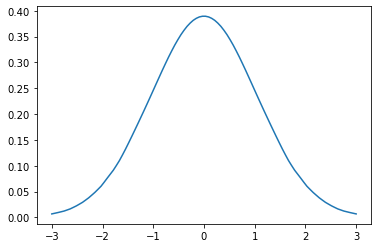

In [3]:
x = np.linspace(lower_bound, upper_bound, num=100)
f_x = np.array([smoother.pdf(x_i) for x_i in x])
plt.plot(x, f_x)

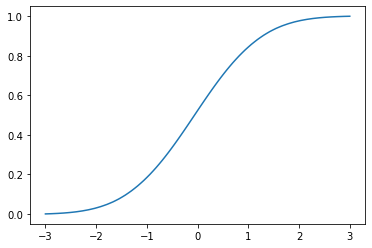

In [4]:
F_x = np.array([smoother.cdf(x_i) for x_i in x])
plt.plot(x, F_x)

# Fitting a smoother with mass constraint

In [5]:
from smoother import Smoother, DerivativeObjective, MassConstraint

import numpy as np
import matplotlib.pyplot as plt

In [6]:
lower_bound, upper_bound = -3, 3
p25_const = MassConstraint(lower_bound, -.67, mass=.25)
p50_const = MassConstraint(-.67, 0, mass=.25)
p75_const = MassConstraint(0, .67, mass=.25)
p100_const = MassConstraint(.67, upper_bound, mass=.25)
smoother = Smoother().fit(
    lower_bound, 
    upper_bound,
    [p25_const, p50_const, p75_const, p100_const],
    objective=DerivativeObjective(1)
)

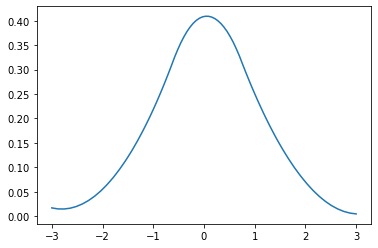

In [7]:
x = np.linspace(lower_bound, upper_bound, num=100)
f_x = np.array([smoother.pdf(x_i) for x_i in x])
plt.plot(x, f_x)

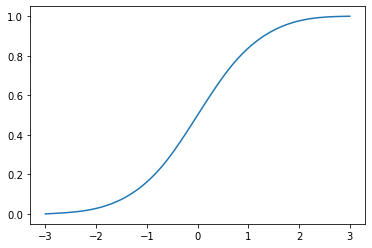

In [8]:
F_x = np.array([smoother.cdf(x_i) for x_i in x])
plt.plot(x, F_x)